In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#去除'\t'
def delet(df):
    for i in df.columns:
        try:
            df[f'{i}']=df[f'{i}'].str.replace('\t','')
        except:
            pass
    return df

In [4]:
day_7=delet(pd.read_csv('./原题/抖音商城运营-总助数据统计及分析/近7天订单数据.csv',encoding='gbk',sep=',',
                  parse_dates=['订单提交时间','订单完成时间','支付完成时间','承诺发货时间','预约发货时间','发货时间']))


In [5]:
month_half=delet(pd.read_csv("./原题/抖音商城运营-总助数据统计及分析/上半月订单数据.csv",encoding='gbk',
                  parse_dates=['订单提交时间','订单完成时间','支付完成时间','承诺发货时间','预约发货时间','发货时间']))


In [6]:
month_one=delet(pd.read_csv("./原题/抖音商城运营-总助数据统计及分析/上月订单数据.csv",encoding='gbk',
                      parse_dates=['订单提交时间','订单完成时间','支付完成时间','承诺发货时间','预约发货时间','发货时间']))
month_one.loc[month_one['省']=='广东','省']='广东省'
month_one.loc[month_one['流量渠道']=='-','流量渠道']='其他'

In [7]:
month_half['红包抵扣']=[float(i) for i in month_half['红包抵扣']]
month_one['红包抵扣']=[float(i) for i in month_one['红包抵扣']]

In [8]:
total=pd.concat([month_half,month_one,day_7])

In [9]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140781 entries, 0 to 17073
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   主订单编号       140781 non-null  int64         
 1   子订单编号       140781 non-null  int64         
 2   选购商品        140781 non-null  object        
 3   商品规格        140781 non-null  object        
 4   商品数量        140781 non-null  int64         
 5   商品ID        140781 non-null  int64         
 6   商家编码        0 non-null       float64       
 7   商品单价        140781 non-null  float64       
 8   订单应付金额      140781 non-null  float64       
 9   运费          140781 non-null  int64         
 10  优惠总金额       140781 non-null  float64       
 11  平台优惠        140781 non-null  object        
 12  商家优惠        140781 non-null  object        
 13  达人优惠        140781 non-null  object        
 14  商家改价        140781 non-null  int64         
 15  支付优惠        140781 non-null  float64       
 16  红包抵

In [10]:
day_7['时间间隔']=(day_7['支付完成时间']-day_7['订单提交时间']).map(lambda x:x.seconds/60)
day_7['支付日期']=day_7['支付完成时间'].dt.date

In [11]:
month_half['时间间隔']=(month_half['支付完成时间']-month_half['订单提交时间']).map(lambda x:x.seconds/60)
month_half['支付日期']=month_half['支付完成时间'].dt.date

In [12]:
month_one['时间间隔']=(month_one['支付完成时间']-month_one['订单提交时间']).map(lambda x:x.seconds/60)
month_one['支付日期']=month_one['支付完成时间'].dt.date

In [13]:
total['时间间隔']=(total['支付完成时间']-total['订单提交时间']).map(lambda x:x.seconds/60)
total['支付日期']=total['支付完成时间'].dt.date

In [14]:
#提取已支付数据
def paid(df):
    a=df[(df['订单状态']!='待支付')&(df['订单状态']!='已关闭')&(df['售后状态']!='退款成功')&(df['售后状态']!='待收退货')]
    return a

In [15]:
#退款数据
def refund(df):
    a=df[(df['售后状态']=='退款成功')|(df['售后状态']=='待收退货')]
    return a

In [16]:
#数据内容
def attribute(df):
    print(df['订单状态'].unique())
    print(df['支付方式'].unique())
    print(df['旗帜颜色'].unique())
    print('APP渠道',df['APP渠道'].unique())
    print('流量来源',df['流量来源'].unique())
    print('广告渠道',df['广告渠道'].unique())
    print('流量类型',df['流量类型'].unique())
    print('流量体裁',df['流量体裁'].unique())
    print('流量渠道',df['流量渠道'].unique())
    print('售后状态',df['售后状态'].unique())
    print('优惠总金额',df['优惠总金额'].unique())
    print('优惠总金额',df['优惠总金额'].unique())


In [17]:
#折线图
def line(df,i):
    x=df.index
    y=df[f'{i}']
    print(plt.plot(x,y))

In [18]:
#柱状图
def bar(df,i):
    x=df.index
    y=df[f'{i}']
    %matplotlib inline 
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置图像字体为黑体，同时可以显示中文
    plt.rcParams['axes.unicode_minus'] = False  # 设置显示负号
    plt.bar(x,y,label = 'product2')

In [19]:
# 查询函数
def select(df,col):
    s=pd.DataFrame()
    s['总金额']=df.groupby(by=f'{col}').agg({'订单应付金额':'sum'})
    s['商品数量']=df.groupby(by=f'{col}').agg({'商品数量':'sum'})
    s['订单数量']=df.groupby(by=f'{col}').agg({'商品数量':'count'})
    s['平均商品价价']=round(s['总金额']/s['商品数量'],2)
    s['平均订单价格']=round(s['总金额']/s['订单数量'],2)
    s=s.sort_values(by=['总金额'],ascending=False)
    return s

In [20]:
def sale(df):
    s=pd.DataFrame()
    s.loc[0,'总金额']=int(df.apply({'订单应付金额':'sum'}))
    s.loc[0,'商品数量']=int(df.apply({'商品数量':'sum'}))
    s.loc[0,'订单数量']=int(df.apply({'商品数量':'count'}))
    s.loc[0,'平均商品价价']=round(float(s['总金额']/s['商品数量']),2)
    s.loc[0,'平均订单价格']=round(float(s['总金额']/s['订单数量']),2)
    return s

## 总体

In [21]:
day_7_p=paid(day_7)
sale(day_7_p)

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
0,852591.0,13552.0,13545.0,62.91,62.95


In [22]:
month_half_p=paid(month_half)
sale(month_half_p)

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
0,1600075.0,25405.0,25377.0,62.98,63.05


In [23]:
month_one_p=paid(month_one)
sale(month_one_p)

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
0,4333562.0,67887.0,67825.0,63.83,63.89


In [24]:
total_p=paid(total)
sale(total_p)

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
0,6786229.0,106844.0,106747.0,63.52,63.57


<BarContainer object of 8 artists>

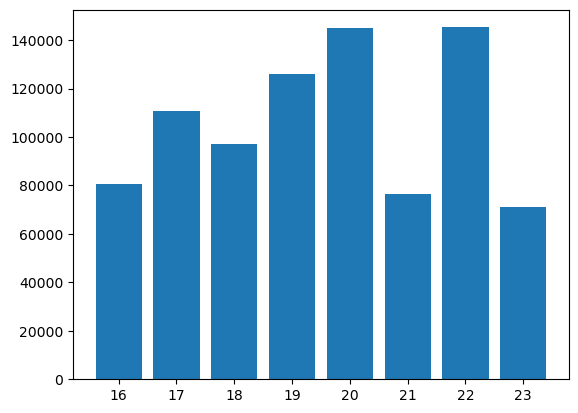

In [25]:
day_7_p_pd=select(day_7_p,'支付日期')
plt.bar(day_7_p_pd.index.map(lambda x:x.day),day_7_p_pd['总金额'])


<BarContainer object of 16 artists>

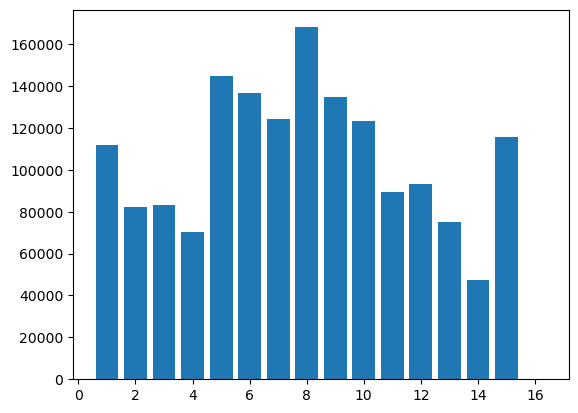

In [26]:
month_half_p=select(month_half_p,'支付日期')
plt.bar(month_half_p.index.map(lambda x:x.day),month_half_p['总金额'])

<BarContainer object of 30 artists>

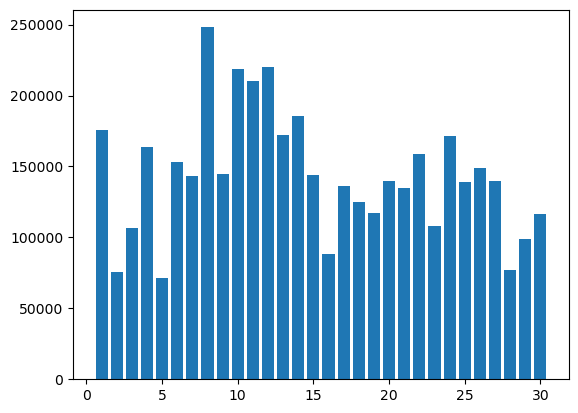

In [27]:
month_one_p=select(month_one_p,'支付日期')
plt.bar(month_one_p.index.map(lambda x:x.day),month_one_p['总金额'])


## 分组

In [28]:
select(total_p,'流量渠道')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
流量渠道,,,,,
其他,3318472.79,51945,51904,63.88,63.93
短视频引流直播间,1484946.78,23955,23947,61.99,62.01
短视频推荐,807193.62,12021,12016,67.15,67.18
直播推荐,416257.18,6677,6676,62.34,62.35
头条西瓜,336195.01,5488,5486,61.26,61.28
搜索,160875.45,2619,2613,61.43,61.57
数据将于第二天更新,73937.15,1188,1187,62.24,62.29
购后页面,51049.29,752,732,67.88,69.74
个人主页&店铺&橱窗进入直播间,30514.70,485,485,62.92,62.92


In [29]:
select(total_p,'广告渠道')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
广告渠道,,,,,
短视频,3768137.56,58205,58175,64.74,64.77
直播,2354518.62,38028,38017,61.92,61.93
无,662472.80,10592,10536,62.54,62.88
商品卡,1101.00,19,19,57.95,57.95


In [30]:
select(total_p,'支付方式')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
支付方式,,,,,
支付宝,1951907.66,30540,30501,63.91,63.99
抖音月付,1907154.69,30658,30642,62.21,62.24
抖音支付,1650745.04,26034,26014,63.41,63.46
微信,1276422.59,19612,19590,65.08,65.16


In [31]:
select(total_p,'APP渠道')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
APP渠道,,,,,
抖音,4986036.93,79015,78939,63.10,63.16
抖音极速版,973047.39,15256,15243,63.78,63.84
头条-抖音电商,232574.38,3760,3759,61.85,61.87
今日头条,229776.00,3174,3170,72.39,72.48
番茄小说-抖音电商,95465.05,1542,1542,61.91,61.91
头条极速版,69337.00,953,952,72.76,72.83
头条lite-抖音电商,65490.73,1069,1067,61.26,61.38
西瓜-抖音电商,64214.70,1041,1041,61.69,61.69
西瓜视频,19830.00,270,270,73.44,73.44


In [32]:
total_p_pd=select(total_p,'商品ID').iloc[:10,:]
total_p_pd['排名']=(-total_p_pd['总金额']).rank()
total_p_pd

,总金额,商品数量,订单数量,平均商品价价,平均订单价格,排名
商品ID,,,,,,
3595154472139107812,2517358.83,40894,40882,61.56,61.58,1.0
3573991726941080892,2047997.90,35610,35596,57.51,57.53,2.0
3513300378596824808,1438377.05,18947,18947,75.92,75.92,3.0
3495456657885023346,509070.16,7403,7359,68.77,69.18,4.0
3495454119500636656,129269.26,1875,1874,68.94,68.98,5.0
3594757793137181478,43155.22,547,547,78.89,78.89,6.0
3564118580406706049,35239.43,302,302,116.69,116.69,7.0
3586332589557992393,18259.50,153,153,119.34,119.34,8.0
3604927220449182874,12098.00,179,177,67.59,68.35,9.0


In [33]:
total_r=refund(total)

In [34]:
total_r_pd=select(total_r,'商品ID').iloc[:10,:]
total_r_pd['排名']=(-total_r_pd['总金额']).rank()
total_r_pd

,总金额,商品数量,订单数量,平均商品价价,平均订单价格,排名
商品ID,,,,,,
3595154472139107812,374891.60,6177,6116,60.69,61.30,1.0
3513300378596824808,221839.89,2908,2908,76.29,76.29,2.0
3573991726941080892,197930.27,3448,3445,57.40,57.45,3.0
3495456657885023346,67094.80,975,971,68.82,69.10,4.0
3495454119500636656,11311.00,164,163,68.97,69.39,5.0
3594757793137181478,6164.00,77,77,80.05,80.05,6.0
3564118580406706049,5484.00,47,46,116.68,119.22,7.0
3601993037330386621,2203.00,52,25,42.37,88.12,8.0
3586332589557992393,2041.00,16,16,127.56,127.56,9.0


In [35]:
select(total_p,'订单状态')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
订单状态,,,,,
已完成,6026512.45,94774,94684,63.59,63.65
已发货,732467.78,11630,11623,62.98,63.02
待发货,27249.75,440,440,61.93,61.93


In [36]:
select(total_r,'订单状态')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
订单状态,,,,,
已关闭,814590.96,12754,12656,63.87,64.36
已完成,69421.06,1068,1067,65.00,65.06
已发货,8938.54,135,134,66.21,66.71


In [37]:
select(total_r,'取消原因')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格


In [38]:
total['取消原因'].unique()

array([nan, '用户超时未支付自动取消', '你已取消订单：暂时不需要这个商品', '你已取消订单：其他理由',
       '你已取消订单：收货地址选择/填写有误', '你已取消订单：价格有点贵', '你已取消订单：商品规格/款式/数量错选',
       '你已取消订单：余额不足/支付方式不全', '你已取消订单：无法使用/少用/错用优惠券',
       '你已取消订单：没有运费险/七天无理由退货等保障', '达人取消', '商家取消该订单，理由：用户重复下单\n如有疑问请联系商家。'],
      dtype=object)

In [39]:
total_r['取消原因']

2        NaN
10       NaN
15       NaN
33       NaN
64       NaN
        ... 
16996    NaN
17013    NaN
17026    NaN
17031    NaN
17041    NaN
Name: 取消原因, Length: 13857, dtype: object

In [40]:
total_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13857 entries, 2 to 17041
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   主订单编号       13857 non-null  int64         
 1   子订单编号       13857 non-null  int64         
 2   选购商品        13857 non-null  object        
 3   商品规格        13857 non-null  object        
 4   商品数量        13857 non-null  int64         
 5   商品ID        13857 non-null  int64         
 6   商家编码        0 non-null      float64       
 7   商品单价        13857 non-null  float64       
 8   订单应付金额      13857 non-null  float64       
 9   运费          13857 non-null  int64         
 10  优惠总金额       13857 non-null  float64       
 11  平台优惠        13857 non-null  object        
 12  商家优惠        13857 non-null  object        
 13  达人优惠        13857 non-null  object        
 14  商家改价        13857 non-null  int64         
 15  支付优惠        13857 non-null  float64       
 16  红包抵扣        13857 non-

In [41]:
select(total,'取消原因')

,总金额,商品数量,订单数量,平均商品价价,平均订单价格
取消原因,,,,,
用户超时未支付自动取消,2079454.94,50727,18342,40.99,113.37
你已取消订单：暂时不需要这个商品,22379.00,373,372,60.00,60.16
你已取消订单：其他理由,9012.85,147,147,61.31,61.31
你已取消订单：余额不足/支付方式不全,5847.00,97,97,60.28,60.28
你已取消订单：收货地址选择/填写有误,4432.00,74,74,59.89,59.89
你已取消订单：商品规格/款式/数量错选,2265.00,38,38,59.61,59.61
你已取消订单：价格有点贵,1592.00,25,25,63.68,63.68
你已取消订单：无法使用/少用/错用优惠券,843.00,14,14,60.21,60.21
你已取消订单：没有运费险/七天无理由退货等保障,492.00,8,8,61.50,61.50
